<a href="https://colab.research.google.com/github/Eukio/CS4372HW1/blob/main/CS4372_HW1_ETT220002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Performance Report Code - HW 1
Eucharist Tan
CS4372
9/19/25

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import seaborn as sns
import statsmodels.api as sm

Stochastic Gradient Descent using SGDRegressor library of Scikit-learn

In [57]:
original_df = pd.read_csv("https://raw.githubusercontent.com/Eukio/CS4372HW1/9714f27a8c780017e82912c3ea0f718ec8903886/student-mat.csv", sep=';')
original_df = pd.get_dummies(original_df, columns=['Pstatus','famsup','paid','schoolsup'], drop_first=True) #one hot encoding
x = original_df[['Medu','Fedu','famrel','failures','absences','studytime','health','G1','G2','goout','Pstatus_T','famsup_yes','schoolsup_yes','paid_yes','G3']].copy()
y = original_df['G3']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

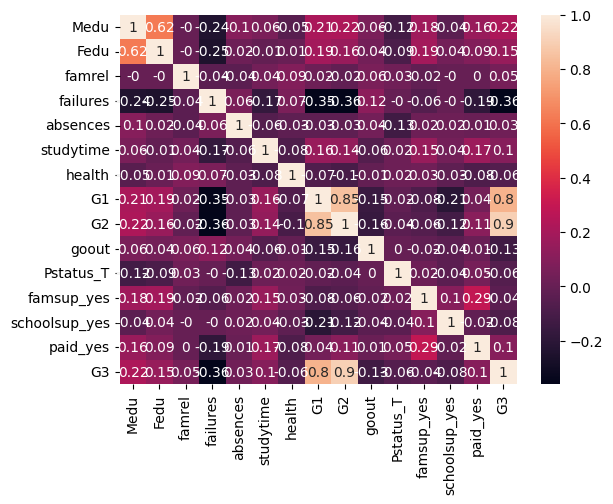

In [58]:
correlation_matrix = x.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
x.drop('G3', axis=1, inplace=True)

In [4]:
features = ['G1','G2'] # Strongest predictors

In [59]:
features = ['failures','goout'] # Stronger negative correlation seen in heatmap

In [ ]:
features = ['Medu','Fedu','famrel'] # Strongest positive correlation, very weak correlation

In [ ]:
features = ['famsup_yes','schoolsup_yes','paid_yes'] #Financial support influence, very weak correlation

In [ ]:
features = ['absences','goout'] #Little to none correlation

In [ ]:
features = ['studytime']  #Little to none correlation

In [60]:
x = x_scaled[features]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=40)
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)

X_train shape: (316, 2) X_test shape: (79, 2)


In [68]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant')
sgd.fit(X_train, y_train)
print("SGDRegressor R^2 score on test set:", sgd.score(X_test, y_test))

SGDRegressor R^2 score on test set: 0.16939592052900654


In [69]:
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse, "MAE:", mae, "Explained Variance:", ev, "R2 Score:", r2)

MSE: 16.064822500366077 MAE: 2.9858465057704775 Explained Variance: 0.1753526733129287 R2 Score: 0.16939592052900654


Ordinary Linear Regression using the statsmodels library

In [74]:
x = x[features]
x = sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())
y_test_predict = res.predict(X_test)
sm.tools.eval_measures.rmse(y_test, y_test_predict)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     28.51
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           4.24e-12
Time:                        18:27:59   Log-Likelihood:                -902.61
No. Observations:                 316   AIC:                             1811.
Df Residuals:                     313   BIC:                             1822.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5217      0.238     44.191      0.0

np.float64(4.4196909526026)